<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import pearson_correlation_fs, seleckKBest_fs

**KNN Regressor Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

In [4]:
# global random seed
RAND_SEED = 42

# dictionary of hyper-parameters
n_neighbors = [x for x in range(1, 31)] # 1 to 30
param_grid = {
    'n_neighbors': n_neighbors,
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5]
}

## 1. Experimentation on the Weather Daily dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [6]:
# KNN Regressor Model
model = KNeighborsRegressor(n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'n_neighbors': 25, 'p': 2, 'weights': 'distance'}
Train set performance: r2-score=0.2495, mae=5.9616, rmse=12.9397


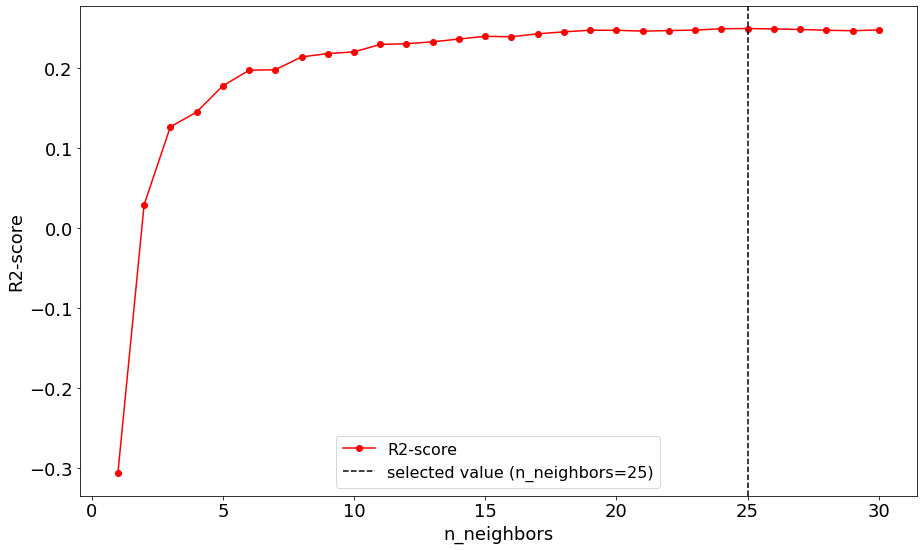

In [7]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_neighbors': selected_hyperparams['n_neighbors'],
                         'weights': selected_hyperparams['weights'],
                         'p': selected_hyperparams['p'], 
                         'n_jobs': -1}

showEvalutationGraph_regression(KNeighborsRegressor, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_neighbors', x_axis_param_vals=n_neighbors, 
                                selected_model_params=selected_model_params)

In [8]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1513, mae=6.4879, rmse=15.9295


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))
dropping Solar Radiation (cal/cm^2/day) from (Solar Radiation (cal/cm^2/day), Sunshine (hour/day))


In [10]:
# KNN Regressor Model
model = KNeighborsRegressor(n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_daily_fs_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'n_neighbors': 28, 'p': 1, 'weights': 'distance'}
Train set performance: r2-score=0.2633, mae=5.8311, rmse=12.8147


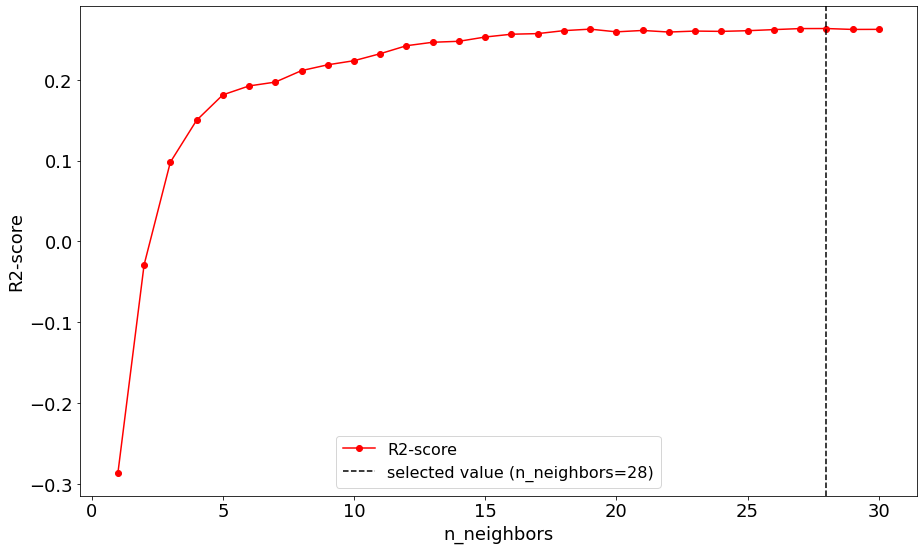

In [11]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_neighbors': selected_hyperparams['n_neighbors'],
                         'weights': selected_hyperparams['weights'],
                         'p': selected_hyperparams['p'], 
                         'n_jobs': -1}

showEvalutationGraph_regression(KNeighborsRegressor, weather_daily_fs_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_neighbors', x_axis_param_vals=n_neighbors, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.17, mae=6.3228, rmse=15.753


## 2. Experimentation on the Weather Weekly dataset

In [13]:
# Load the train dataset
weather_weekly_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_avg_train_regression.csv')

# Load the test set
weather_weekly_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_avg_test_regression.csv')

In [14]:
# KNN Regressor Model
model = KNeighborsRegressor(n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_weekly_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'n_neighbors': 29, 'p': 1, 'weights': 'distance'}
Train set performance: r2-score=0.0571, mae=7.7968, rmse=15.1916


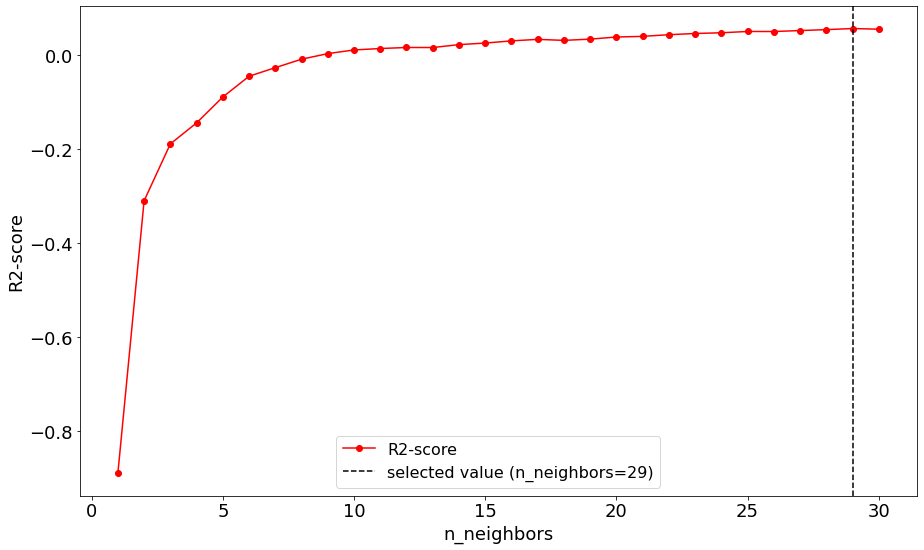

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_neighbors': selected_hyperparams['n_neighbors'],
                         'weights': selected_hyperparams['weights'],
                         'p': selected_hyperparams['p'], 
                         'n_jobs': -1}

showEvalutationGraph_regression(KNeighborsRegressor, weather_weekly_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_neighbors', x_axis_param_vals=n_neighbors, 
                                selected_model_params=selected_model_params)

In [16]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_weekly_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.0704, mae=7.1755, rmse=14.5298


### 2.1 Apply Pearson Feature Selection to Weekly Weather Dataset

In [17]:
# select features from the train dataset
weather_weekly_fs_train_df, cols_to_drop = pearson_correlation_fs(weather_weekly_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_weekly_fs_test_df = weather_weekly_test_df.drop(columns=cols_to_drop)

dropping Avg Max Temp. (degree Celcius) from (Avg Max Temp. (degree Celcius), Avg Min Temp. (degree Celcius))
dropping Avg Cloudy (hour/day) from (Avg Cloudy (hour/day), Avg Relative Humidity (afternoon, %))
dropping Avg Sunshine (hour/day) from (Avg Cloudy (hour/day), Avg Sunshine (hour/day))
dropping Avg Sunshine (hour/day) from (Avg Solar Radiation (cal/cm^2/day), Avg Sunshine (hour/day))


In [18]:
# KNN Regressor Model
model = KNeighborsRegressor(n_jobs=-1)

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, weather_weekly_fs_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Train set performance: r2-score=0.0643, mae=7.7171, rmse=15.12


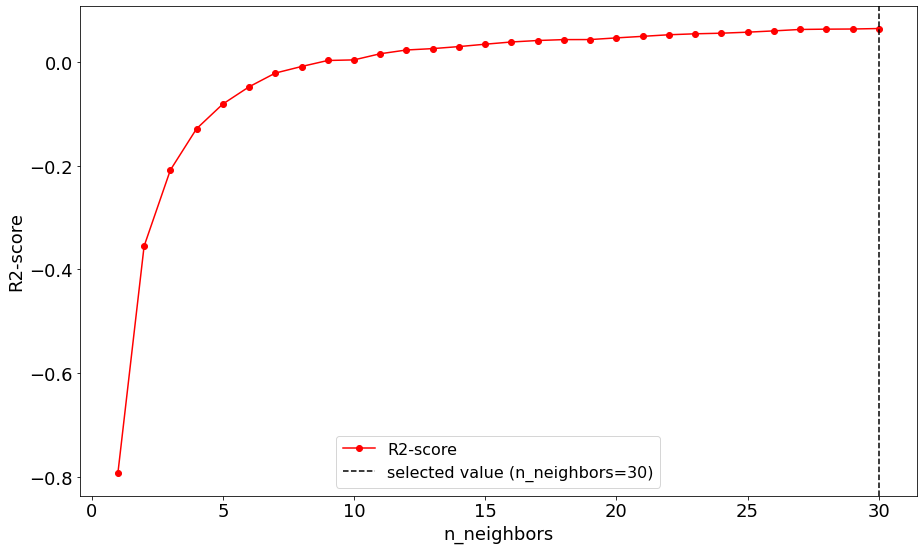

In [19]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = {'n_neighbors': selected_hyperparams['n_neighbors'],
                         'weights': selected_hyperparams['weights'],
                         'p': selected_hyperparams['p'], 
                         'n_jobs': -1}

showEvalutationGraph_regression(KNeighborsRegressor, weather_weekly_fs_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name='n_neighbors', x_axis_param_vals=n_neighbors, 
                                selected_model_params=selected_model_params)

In [20]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_weekly_fs_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.067, mae=7.0703, rmse=14.5565
